In [1]:
from skimage.io import imsave, imread, imshow
from numpy import roll, dstack
from skimage import img_as_float, img_as_ubyte

In [68]:
def corr(fchannel, schannel):
    from numpy import roll
    maxcory = 0
    maxcorx = 0
    resy = 0
    resx = 0   
    for i in range(-15,15,1):
        curcory = (fchannel * roll(schannel, i, axis=0)).sum()
        curcorx = (fchannel * roll(schannel, i, axis=1)).sum()
        if curcory > maxcory:
            maxcory = curcory
            resy = i
        if curcorx > maxcorx:
            maxcorx = curcorx
            resx = i
    return resy, resx

In [64]:
def align(img):    
    img = img_as_float(img)
    a0=int(img.shape[0]/3)    
    a1=img.shape[0]
    d=int(0.1*a0)
    hborder = int(0.2*img.shape[1]/3)
    r=img[2*a0+d:a1-a1%3-d, hborder:-hborder]  
    g=img[a0+d:2*a0-d,hborder:-hborder]
    b=img[d:a0-d,hborder:-hborder]    
    g2ry, g2rx = corr(g, r)
    g2by, g2bx = corr(g, b)
    r = roll(r, g2ry, axis=0)
    r = roll(r, g2rx, axis=1)
    b = roll(b, g2by, axis=0)
    b = roll(b, g2bx, axis=1)
    res = dstack((r, g, b))
    return res

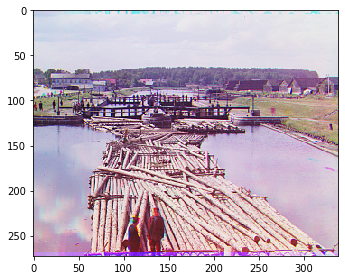

In [71]:
imshow(img_as_ubyte(align(imread('in.jpg'))))

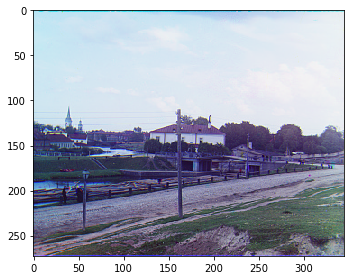

In [69]:
imshow(img_as_ubyte(align(imread('in1.jpg'))))

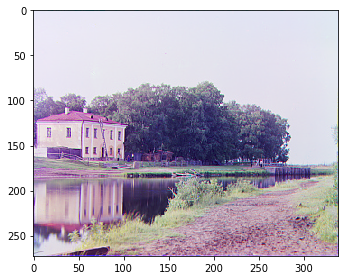

In [70]:
imshow(img_as_ubyte(align(imread('in2.jpg'))))